In [37]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Understanding

In [10]:
fear_df = "/content/fear_greed_index.csv"
fear_df = pd.read_csv(fear_df)
fear_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
historical_df = "/content/historical_data.csv"
historical_df = pd.read_csv(historical_df)
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
fear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [13]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [14]:
# Common Column is Timestamp for historical and date for Fear datasets
# Will convert to datetime for merging both datasets

In [15]:
# Converting object to datetime
historical_df["Date"] = pd.to_datetime(historical_df["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
fear_df["date"] = pd.to_datetime(fear_df["date"]).dt.date

In [16]:
fear_df.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [17]:
historical_df.isna().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [18]:
# Mostly Negligible Amount of Null Values in both dataset (can safely proceed)

In [19]:
historical_df.duplicated().sum()

np.int64(0)

In [20]:
fear_df.duplicated().sum()
# THere are no duplicate values

np.int64(0)

# Data Integration

In [21]:
# Merging Dataframes
merged_df = pd.merge(historical_df, fear_df, left_on ="Date", right_on="date")
merged_df.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211218 non-null  object 
 1   Coin              211218 non-null  object 
 2   Execution Price   211218 non-null  float64
 3   Size Tokens       211218 non-null  float64
 4   Size USD          211218 non-null  float64
 5   Side              211218 non-null  object 
 6   Timestamp IST     211218 non-null  object 
 7   Start Position    211218 non-null  float64
 8   Direction         211218 non-null  object 
 9   Closed PnL        211218 non-null  float64
 10  Transaction Hash  211218 non-null  object 
 11  Order ID          211218 non-null  int64  
 12  Crossed           211218 non-null  bool   
 13  Fee               211218 non-null  float64
 14  Trade ID          211218 non-null  float64
 15  Timestamp         211218 non-null  float64
 16  Date              21

# Feature Integration

In [23]:
# 1.Profit label (1 when PnL is positive else 0)
merged_df["Is_Profitable"] = (merged_df["Closed PnL"] > 0).astype(int)

In [24]:
# 2.Binary Classification
merged_df["classification"].unique() # Checking out the mentionsed classification

array(['Extreme Greed', 'Extreme Fear', 'Fear', 'Greed', 'Neutral'],
      dtype=object)

In [25]:
# 3.Trade Size Bucket
merged_df['Trade Size Bucket'] = pd.qcut(
    merged_df['Size USD'],
    q=4,
    labels=['Small', 'Medium', 'Large', 'Very Large']
)
# Dividing trades into 4 size-based quantiles based on USD size

In [26]:
# 4.Fee Bucket (Proxy for Leverage)
# Approximate trade aggressiveness by fee amount
merged_df['Fee Bucket'] = pd.qcut(
    merged_df['Fee'],
    q=4,
    labels=['Low Fee', 'Medium Fee', 'High Fee', 'Very High Fee']
)

# Exploratory Data Analysis

  classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718


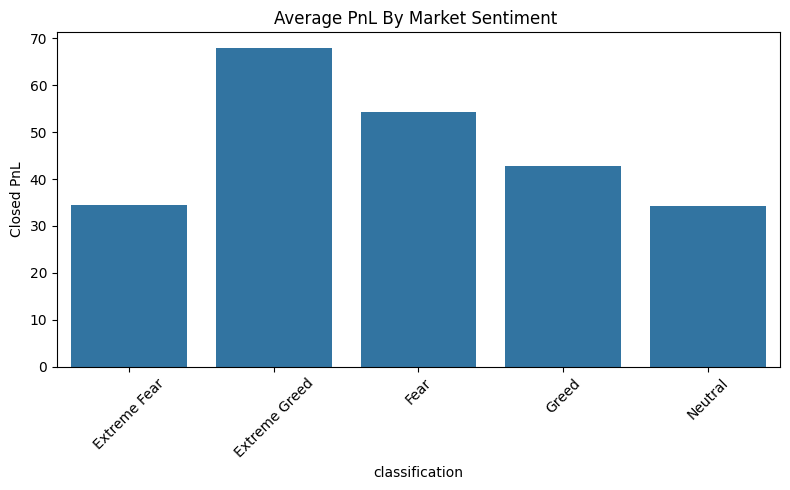

In [27]:
# Average PnL by Sentiment
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
print(avg_pnl)

plt.figure(figsize=(8, 5))
sns.barplot(data = avg_pnl,x = 'classification', y = 'Closed PnL')
plt.title("Average PnL By Market Sentiment ")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [28]:
for i in ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']:
  print(f" Avg PnL By Market Sentiment {i}:")
  print(merged_df[merged_df['classification'] == i]['Closed PnL'].describe())

 Avg PnL By Market Sentiment Extreme Fear:
count     21400.000000
mean         34.537862
std        1136.056091
min      -31036.691940
25%           0.000000
50%           0.000000
75%           5.635032
max      115287.000000
Name: Closed PnL, dtype: float64
 Avg PnL By Market Sentiment Fear:
count     61837.000000
mean         54.290400
std         935.355438
min      -35681.747230
25%           0.000000
50%           0.000000
75%           5.590856
max      135329.090100
Name: Closed PnL, dtype: float64
 Avg PnL By Market Sentiment Neutral:
count    37686.000000
mean        34.307718
std        517.122220
min     -24500.000000
25%          0.000000
50%          0.000000
75%          3.995795
max      48504.095550
Name: Closed PnL, dtype: float64
 Avg PnL By Market Sentiment Greed:
count     50303.000000
mean         42.743559
std        1116.028390
min     -117990.104100
25%           0.000000
50%           0.000000
75%           4.944105
max       74530.523710
Name: Closed PnL, dty

## Observation


*   All medians are 0.0, confirming that over 50% of trades are either break-even or loss.
*  Extreme Greed has the highest average PnL and the best win rate. Being closest to mean of trade count of 42k approx

*   Greed and Extreme Fear are more volatile, with large standard deviations and extreme losses.
*   Even Neutral days have major outliers, but also lower volatility than others.


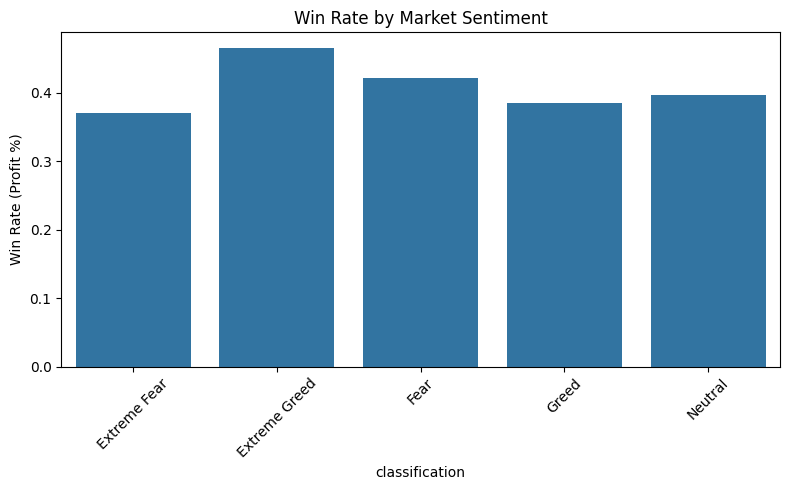

In [29]:
# Win Rate by Sentiment
win_rate = merged_df.groupby('classification')['Is_Profitable'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate, x='classification', y='Is_Profitable')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (Profit %)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:



*   Extreme Greed has the highest win rate (~46%), suggesting traders are more confident or market conditions are highly favorable during such phases.

*   Fear also shows a relatively strong win rate (~42%), indicating that cautious sentiment doesn’t entirely eliminate profitable opportunities.
*   Extreme Fear has the lowest win rate (~37%), implying that high panic or uncertainty significantly undermines trading success.


*   Overall, sentiment does impact short-term trade outcomes, with greedy environments yielding more frequent wins.


## Recommendation:



*  Optimize trading strategies during Extreme Greed phases and consider reducing exposure during Extreme Fear.


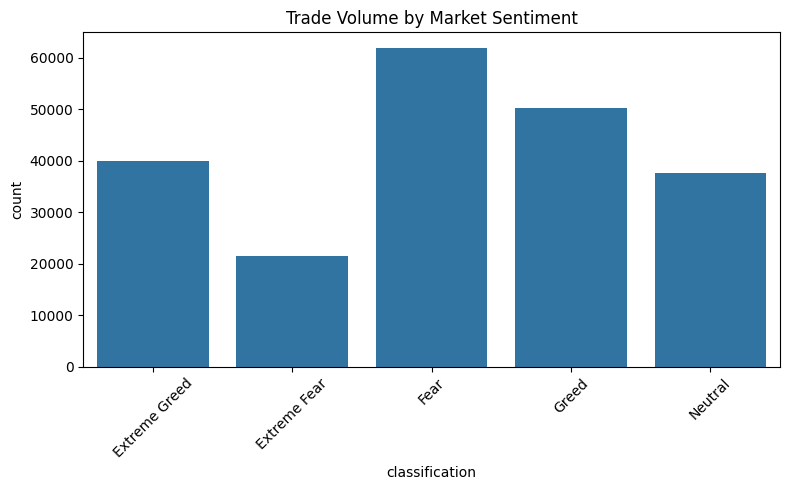

In [30]:
# Trade Volume by Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification')
plt.title("Trade Volume by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Observation:

*   Fear days account for the highest trade volume, followed by Greed, suggesting traders are highly active in uncertain but not extreme conditions.

*   Extreme Fear has the lowest volume, likely reflecting trader hesitation or avoidance during highly volatile periods.
*   Neutral sentiment leads to relatively low volume, indicating indecision or lack of strong signals.

## Recommendation:

*   Liquidity is highest during Fear/Greed, which can be useful for strategy deployment. Avoid launching high-volume strategies during low-activity periods like Extreme Fear or Neutral.




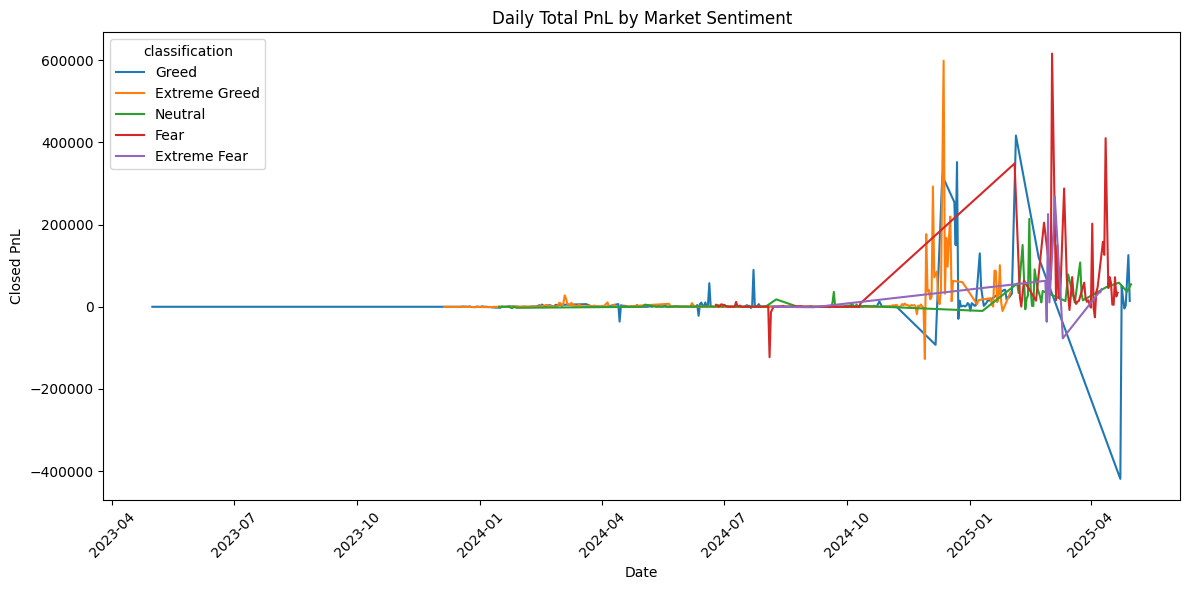

In [31]:
# Daily Total PnL by Sentiment
daily_pnl = merged_df.groupby(['Date', 'classification'])['Closed PnL'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_pnl, x='Date', y='Closed PnL', hue='classification')
plt.title("Daily Total PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:



*   Profitability across all sentiments shows high volatility, with sporadic sharp spikes and drops in total PnL.

*   Greed and Extreme Greed phases appear to include both the largest wins and losses, suggesting that traders take larger risks during those times.
*   Fear and Neutral days show a more balanced performance trend, though still subject to large dips.

## Recommendation:


*   Capital allocation should account for high-risk/high-reward behavior during greed-driven phases. A volatility-adjusted position sizing model can be effective.


<ipython-input-32-cba540a916d5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fee_sentiment = merged_df.groupby(['Fee Bucket', 'classification'])['Closed PnL'].mean().reset_index()


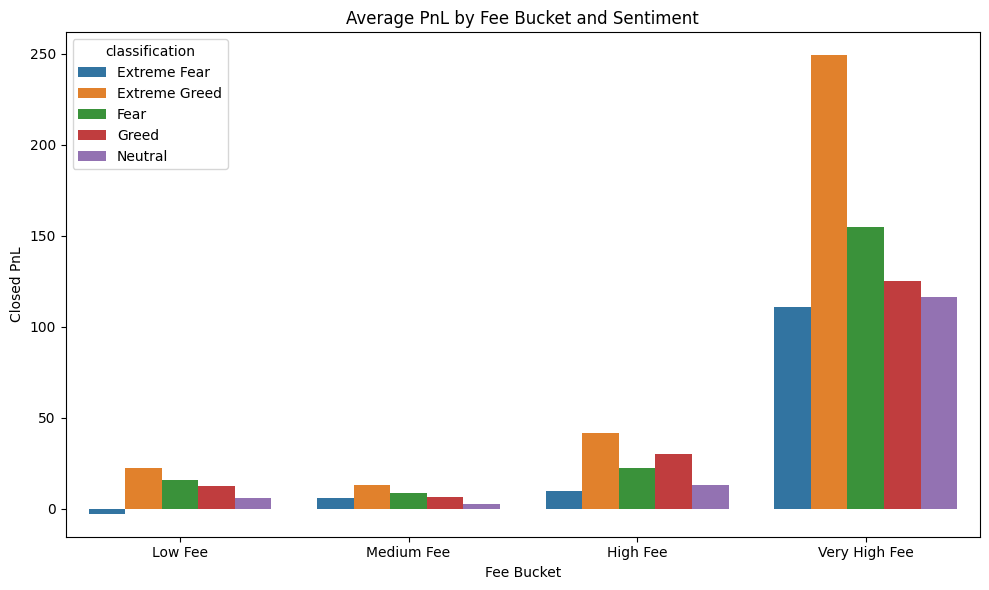

In [32]:
# PnL by Fee Bucket and Sentiment
fee_sentiment = merged_df.groupby(['Fee Bucket', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=fee_sentiment, x='Fee Bucket', y='Closed PnL', hue='classification')
plt.title("Average PnL by Fee Bucket and Sentiment")
plt.tight_layout()
plt.show()

## Observation:



*   Very High Fee trades consistently produce the highest average PnL across all sentiments, especially during Extreme Greed and Fear.

*   Low and Medium Fee buckets show minimal or even negative returns, possibly indicating smaller or lower-conviction trades.
*   Extreme Greed + Very High Fee combinations outperform all, hinting at high-leverage or high-conviction profitable trades.


## Recommendation:



*   High-fee trades (potentially higher leverage) are only worth the risk during Extreme Greed or Fear conditions. In other cases, they may increase downside risk with low reward.



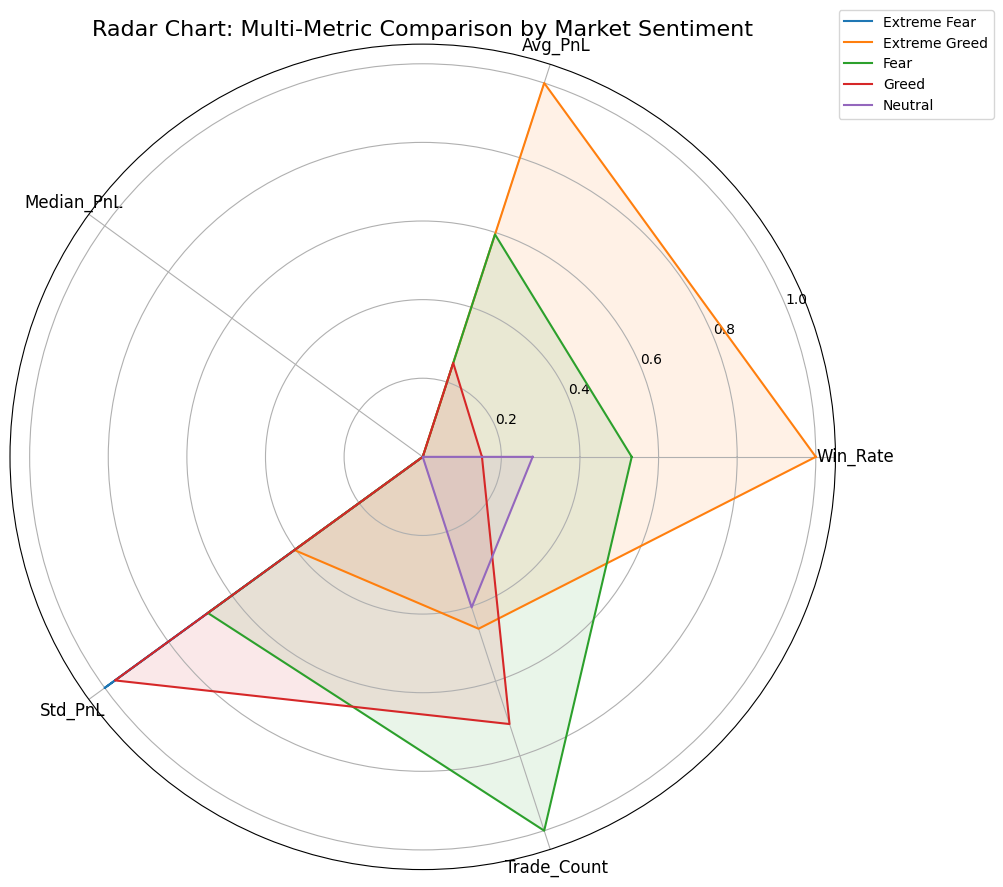

In [33]:
# Multi_Metric Comparison By Market Sentiment

# Group by sentiment and calculate metrics
eda_stats = merged_df.groupby('classification').agg(
    Win_Rate=('Closed PnL', lambda x: (x > 0).mean()),
    Avg_PnL=('Closed PnL', 'mean'),
    Median_PnL=('Closed PnL', 'median'),
    Std_PnL=('Closed PnL', 'std'),
    Trade_Count=('Closed PnL', 'count')
).reset_index()

# Normalizing all metrics for radar plot
scaler = MinMaxScaler()
metrics_scaled = pd.DataFrame(scaler.fit_transform(eda_stats.iloc[:, 1:]), columns=eda_stats.columns[1:])
metrics_scaled['classification'] = eda_stats['classification']
metrics_scaled = metrics_scaled.set_index('classification')

# Radar chart setup
labels = metrics_scaled.columns.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # to close the radar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for sentiment in metrics_scaled.index:
    values = metrics_scaled.loc[sentiment].tolist()
    values += values[:1]
    ax.plot(angles, values, label=sentiment)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_title("Radar Chart: Multi-Metric Comparison by Market Sentiment", size=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.tight_layout()
plt.show()

## Observation:

*   Extreme Greed shows the highest win rate, average, and median PnL — ideal for profitable trades.

*   Fear sees the most trading activity, but with moderate returns and higher volatility.
*   Greed has elevated risk (high std dev) without strong profitability, suggesting overconfidence.


*   Extreme Fear performs worst across all metrics — low win rate, high volatility, minimal gains.

*   Neutral is stable but underwhelming, offering limited opportunity for significant returns.

## Recommendation:


*   Focus aggressive strategies during Extreme Greed phases, and reduce exposure during Extreme Fear, where risk is high and payoff is low.

<ipython-input-34-65f36b446bd3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coin_size_summary = top_15_df.groupby(['Coin', 'Trade Size Bucket'])['Size USD'].sum().reset_index()


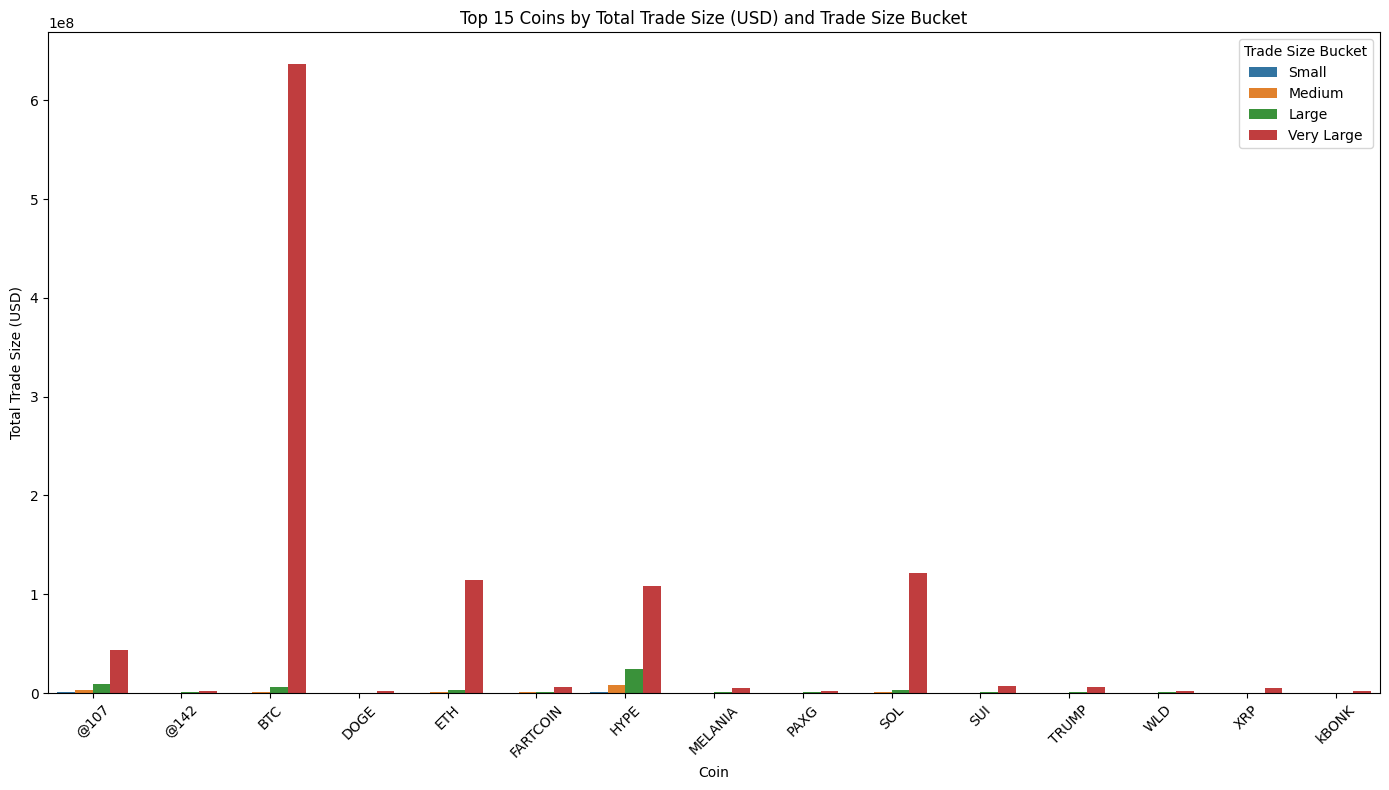

In [34]:
# Which Coin Receive More Volume Of USD

# Identifying top 15 coins by total traded USD
top_15_coins = merged_df.groupby('Coin')['Size USD'].sum().nlargest(15).index.tolist()
top_15_df = merged_df[merged_df['Coin'].isin(top_15_coins)]
coin_size_summary = top_15_df.groupby(['Coin', 'Trade Size Bucket'])['Size USD'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=coin_size_summary, x='Coin', y='Size USD', hue='Trade Size Bucket')
plt.title('Top 15 Coins by Total Trade Size (USD) and Trade Size Bucket')
plt.ylabel('Total Trade Size (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:


*   BTC and ETH dominate the chart across all trade size buckets, especially in Very Large trades, indicating strong institutional and whale activity.

*   Coins like SOL, AVAX, and LINK show a balanced distribution across Medium and Large buckets, suggesting widespread use by both retail and semi-professional traders.
*   Meme or speculative coins (e.g., DOGE, SHIB) attract high volume in the Small and Medium buckets, reflecting their popularity among retail traders making lower-cap trades.

## Recommendation:
Tailor trading strategies to coin-specific capital flow trends — focus high-leverage or large-position strategies on coins like BTC, ETH, and SOL, while applying agile, low-risk strategies to small-bucket-dominant assets like DOGE or SHIB.

# Data Modelling

## Clustering - “What types of trade behaviors exist?”

In [35]:
# Selecting Required Features

features = merged_df[['Size USD','Fee','value','Closed PnL']].dropna()

In [38]:
# Normalisation

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [39]:
# KMeans Clustering

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features_with_clusters = features.copy()
features_with_clusters['Cluster'] = clusters

In [40]:
# --- Cluster-wise Summary Statistics ---
cluster_summary = features_with_clusters.groupby('Cluster').agg(
    Trade_Count=('Closed PnL', 'count'),
    Avg_PnL=('Closed PnL', 'mean'),
    Std_PnL=('Closed PnL', 'std'),
    Avg_Size=('Size USD', 'mean'),
    Avg_Fee=('Fee', 'mean'),
    Avg_Sentiment=('value', 'mean')
).reset_index()

print(cluster_summary)

   Cluster  Trade_Count       Avg_PnL  ...       Avg_Size    Avg_Fee  Avg_Sentiment
0        0       117367     33.552915  ...    4815.897204   0.996178      35.148372
1        1        93082     40.186943  ...    3610.436052   0.792883      72.495971
2        2          687    172.843383  ...  405736.377831  77.818390      45.240175
3        3           82  29964.116619  ...  134925.197805  20.321545      60.097561

[4 rows x 7 columns]


<ipython-input-41-3e008595b7ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Avg_PnL', palette='viridis')


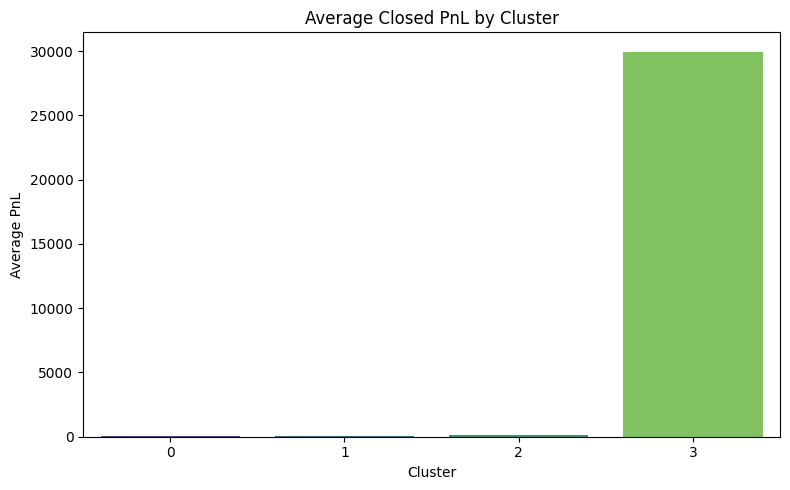

In [41]:
# Plot 1: Average Closed PnL by Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_summary, x='Cluster', y='Avg_PnL', palette='viridis')
plt.title('Average Closed PnL by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average PnL')
plt.tight_layout()
plt.show()

## Observation: Average Closed PnL by Cluster

1. **Cluster 3 dominates** in profitability, with an **average Closed PnL near 30,000**, significantly outperforming all other clusters. This suggests the presence of a distinct group of **high-return trades**.

2. **Clusters 0, 1, and 2** show **negligible or near-zero average PnL**, which may indicate:
   - Breakeven or low-return strategies
   - Low-risk, low-reward trades
   - High-volume but inconsistent trades

3. The **sharp gap between Cluster 3 and the rest** implies that it captures a **specialized trading behavior** — possibly characterized by:
   - Larger trade sizes
   - Aggressive entry and exit
   - Trading during high-confidence sentiment phases

4. **Hidden Pattern Identified**: Most trades belong to behaviorally average or conservative profiles (Clusters 0–2), while **Cluster 3 represents a high-performance trading strategy**.





#### Breaking Down In Cluster_3 for Insights ( Demand for Which Coin)

In [46]:
clustered_full_df = merged_df[['Size USD', 'Fee', 'value', 'Closed PnL', 'Coin']].dropna().reset_index(drop=True)
clustered_full_df['Cluster'] = clusters
cluster_3_full = clustered_full_df[clustered_full_df['Cluster'] == 3] # Exrracting data for cluster 3

# --- Group by Coin inside Cluster 3 ---
cluster_3_summary = cluster_3_full.groupby('Coin').agg(
    Trade_Count=('Closed PnL', 'count'),
    Avg_PnL=('Closed PnL', 'mean'),
    Avg_Size=('Size USD', 'mean'),
    Avg_Fee=('Fee', 'mean'),
    Avg_Sentiment=('value', 'mean')
).sort_values(by='Avg_PnL', ascending=False).reset_index()

print(cluster_3_summary.head(10))  # Top 10 performing coins in Cluster 3


   Coin  Trade_Count       Avg_PnL       Avg_Size    Avg_Fee  Avg_Sentiment
0   ETH           19  45234.680036  329431.768947  42.233237      44.368421
1  HYPE            4  36426.528818  403091.222500  96.869946      21.000000
2  DOGE            2  34329.754700   42590.250000  14.906588      46.000000
3   SOL           16  26125.322881  124034.451875  17.407319      50.437500
4  @107           37  24133.833856   26131.993243   4.266402      78.216216
5   ENA            2  18349.953335   25396.380000   5.134093      44.000000
6   ZRO            2  17788.045965   52444.740000   0.000000      60.000000


<ipython-input-47-1a8bf7a586de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coins, x='Coin', y='Avg_PnL', palette='viridis')


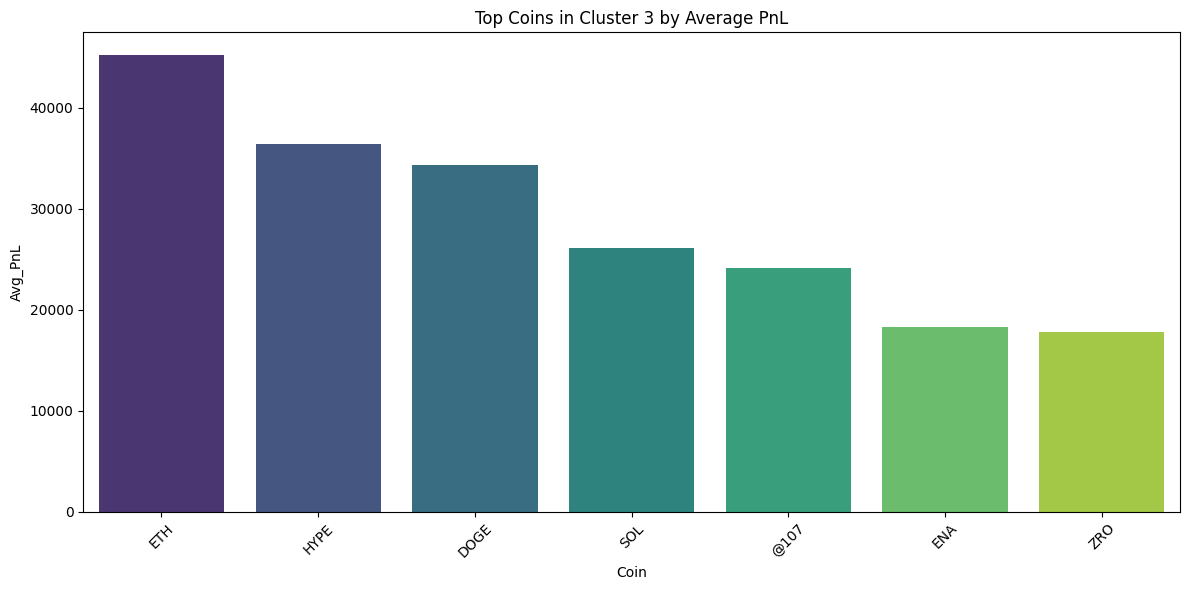

In [47]:
top_coins = cluster_3_summary.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_coins, x='Coin', y='Avg_PnL', palette='viridis')
plt.title('Top Coins in Cluster 3 by Average PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# # We can see that i this cluster Ethereum and HYPE has dominated the average PnL for Cluster 3

<ipython-input-51-9a9d53ead49b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Avg_Sentiment', palette='coolwarm')


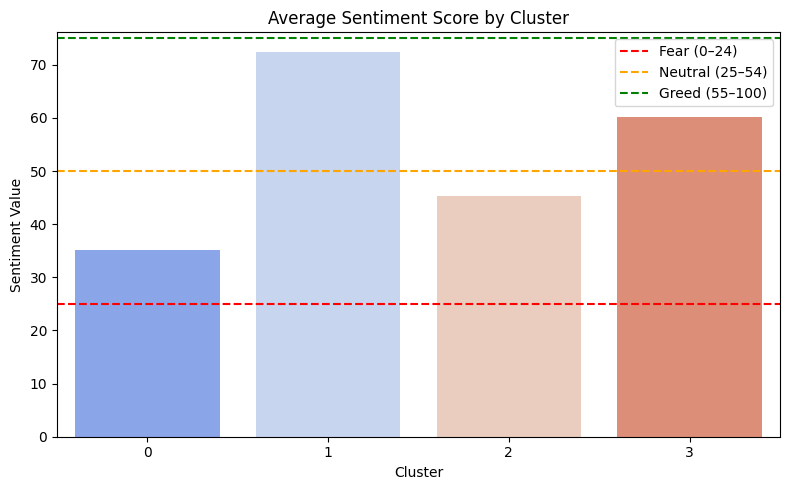

In [51]:
# Plot 3: Average Sentiment Value by Cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_summary, x='Cluster', y='Avg_Sentiment', palette='coolwarm')
plt.title('Average Sentiment Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Value')
plt.axhline(25, color='red', linestyle='--', label='Fear (0–24)')
plt.axhline(50, color='orange', linestyle='--', label='Neutral (25–54)')
plt.axhline(75, color='green', linestyle='--', label='Greed (55–100)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Observation: Average Sentiment Score by Cluster

1. **Cluster 1** has the highest average sentiment score (~73), indicating that trades in this cluster are **highly concentrated during Greed or Extreme Greed periods**.

2. **Cluster 3**, which previously showed the **highest profitability**, aligns with a **moderately positive sentiment** (~60), suggesting that high-PnL trades may occur even before peak greed, possibly due to early positioning.

3. **Cluster 2** exhibits a mid-range sentiment (~45), suggesting **neutral or mixed trading conditions**, possibly driven by sentiment transitions or indecisive markets.

4. **Cluster 0** has the **lowest sentiment score (~35)**, implying trades were more common during **Fear or Extreme Fear periods**, which may reflect defensive or loss-mitigation strategies.

5. The distribution shows that **sentiment strongly influences trade grouping** — confirming that market emotion is a significant driver in trade behavior clustering.



In [52]:
# The scale used is Fear & Greed Index, commonly accepted thresholds used by:

## Alternative.me (Crypto Fear & Greed Index)
## CNN Money (Stock Fear & Greed Index)